In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from scipy.stats import linregress

In [19]:
# # Replace 'your_file.csv' with the actual path to your CSV file.
csv_file = 'data/tmdb_5000_movies.csv'

# # Read the CSV file into a pandas DataFrame.
df = pd.read_csv(csv_file)

# # Display basic information about the DataFrame.
print("Number of rows and columns:")
print(df.shape)

# print("\nColumn names:")
print(df.columns)

# print("\nData types of columns:")
print(df.dtypes)

# # Display the first few rows of the DataFrame.
print("\nFirst few rows of the DataFrame:")
print(df.head())

Number of rows and columns:
(4803, 20)
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count    

In [20]:
df_clean =df[["original_title", "budget", "revenue", "runtime", "vote_average", "genres"]]
#df_clean.head()
print(len(df_clean))

4803


In [21]:
df_clean_1 =df_clean.dropna()
df_clean_1.head()

,original_title,budget,revenue,runtime,vote_average,genres
0,Avatar,237000000,2787965087,162.0,7.2,"[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,300000000,961000000,169.0,6.9,"[Adventure, Fantasy, Action]"
2,Spectre,245000000,880674609,148.0,6.3,"[Action, Adventure, Crime]"
3,The Dark Knight Rises,250000000,1084939099,165.0,7.6,"[Action, Crime, Drama, Thriller]"
4,John Carter,260000000,284139100,132.0,6.1,"[Action, Adventure, Science Fiction]"


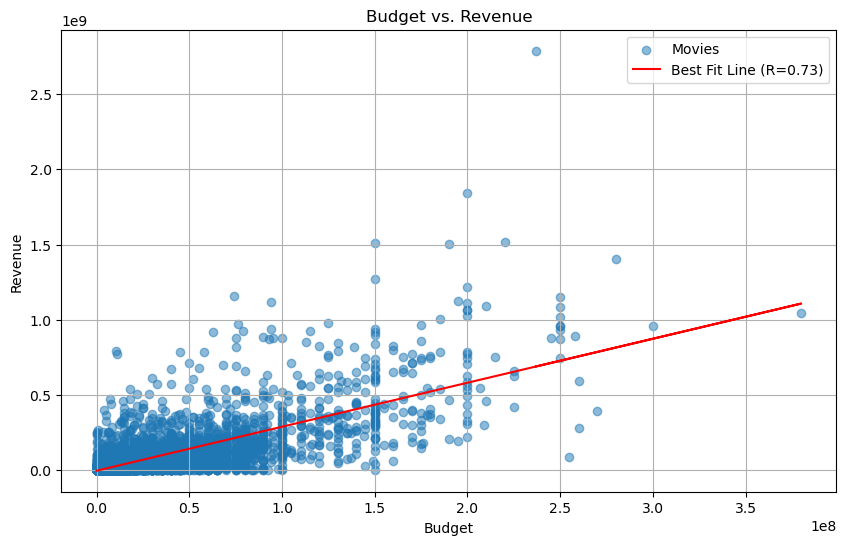

In [22]:
# Filter out rows with missing values in 'budget' or 'revenue' columns
df_clean = df.dropna(subset=['budget', 'revenue'])
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['budget'], df_clean['revenue'], alpha=0.5, label='Movies')
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_clean['budget'], df_clean['revenue'])
# Create a best-fit line
plt.plot(df_clean['budget'], intercept + slope * df_clean['budget'], color='red', label=f'Best Fit Line (R={r_value:.2f})')
# Add labels and a legend
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue')
plt.legend()
# Show the plot
plt.grid(True)
plt.show()

In [23]:
# Load the CSV file into a DataFrame
df = pd.read_csv('data/tmdb_5000_movies.csv')

# Define a function to clean up the "genres" column
def clean_genres(genres_str):
    genres_list = genres_str.strip('[]').replace('"', '').split(', ')
    return [genre.strip() for genre in genres_list]

# Apply the clean_genres function to the "genres" column
df['genres'] = df['genres'].apply(clean_genres)

# Create an empty dictionary to store genre revenue totals
genre_revenue_totals = {}

# Iterate through rows and calculate total revenue for each genre
for index, row in df.iterrows():
    for genre in row['genres']:
        if genre in genre_revenue_totals:
            genre_revenue_totals[genre] += row['revenue']
        else:
            genre_revenue_totals[genre] = row['revenue']

# Convert the dictionary to a DataFrame
genre_revenue_df = pd.DataFrame(list(genre_revenue_totals.items()), columns=['Genre', 'Total Revenue'])

# Sort the DataFrame by total revenue
genre_revenue_df = genre_revenue_df.sort_values(by='Total Revenue', ascending=False)

# Create a pie chart using Plotly
fig = px.pie(
    genre_revenue_df,
    values='Total Revenue',
    names='Genre',
    title='Genre Revenue Distribution',
    hover_name='Genre',  # Display genre names when hovering
)

# Show the interactive pie chart
fig.show()

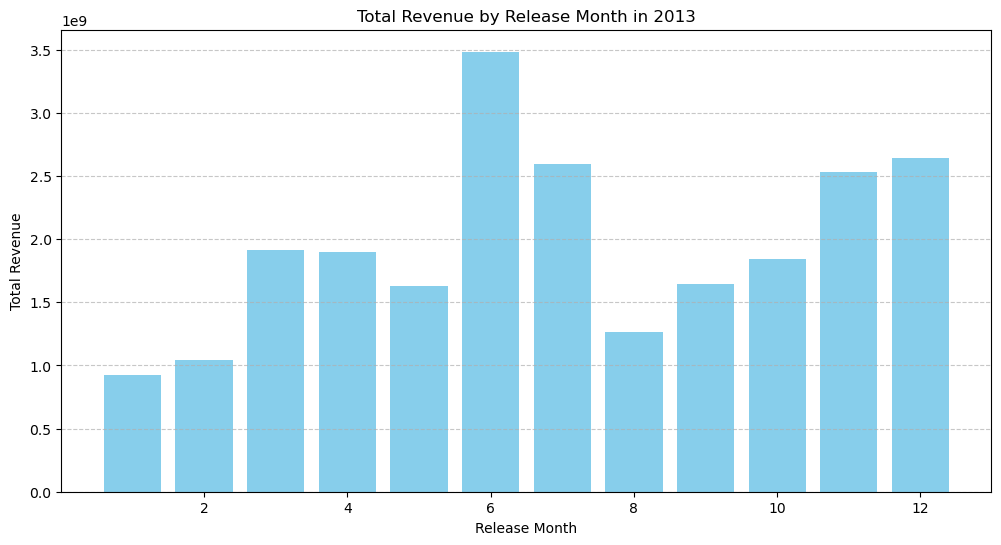

In [24]:
#2013
# Convert 'release_date' column to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
# Extract the release year and month and create new columns
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
# Filter data for the year 2014
df_2013 = df[df['release_year'] == 2013]
# Group the data by release month and calculate the total revenue for each month
revenue_by_month_2013 = df_2013.groupby('release_month')['revenue'].sum()
# Create a bar chart for 2013
plt.figure(figsize=(12, 6))
# Define the order of months to match your data
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Reset the index of revenue_by_month_2013
revenue_by_month_2013 = revenue_by_month_2013.reset_index()
# Create the bar chart with the specified month order
plt.bar(revenue_by_month_2013['release_month'], revenue_by_month_2013['revenue'], color='skyblue')
plt.xlabel('Release Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Release Month in 2013')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

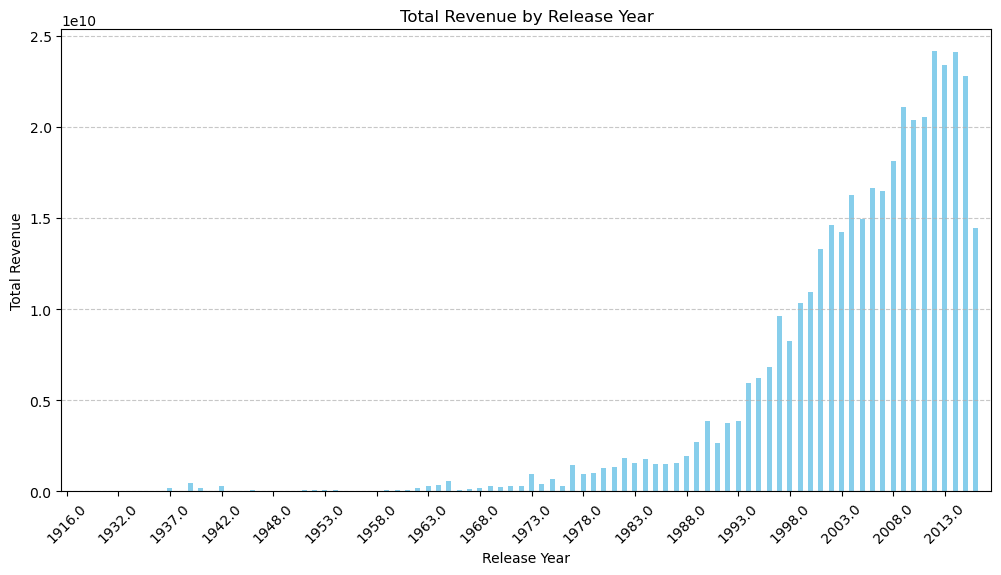

In [25]:
# Convert 'release_date' column to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
# Extract the release year and create a new column
df['release_year'] = df['release_date'].dt.year
# Group the data by release year and calculate the total revenue for each year
revenue_by_year = df.groupby('release_year')['revenue'].sum()
# Create a bar chart
plt.figure(figsize=(12, 6))
revenue_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Release Year')
# Set x-axis ticks to show every 5 years
plt.xticks(range(0, len(revenue_by_year), 5), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

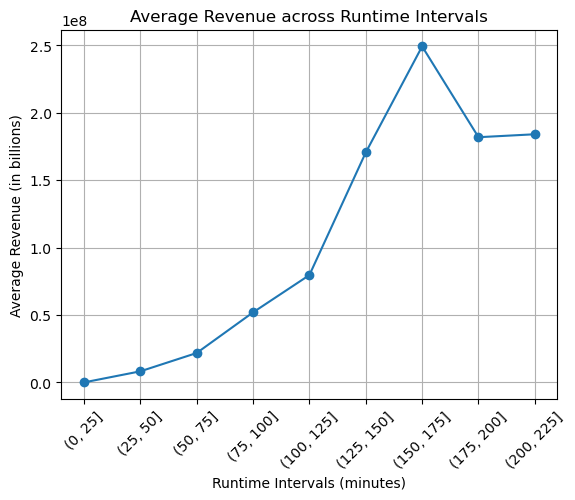

In [26]:
df_clean['runtime_category'] = pd.cut(df_clean['runtime'], bins=range(0, 250, 25))
grouped_data = df_clean.groupby('runtime_category')['revenue'].mean()
plt.plot(grouped_data.index.astype(str), grouped_data.values, marker='o')
plt.title('Average Revenue across Runtime Intervals')
plt.xlabel('Runtime Intervals (minutes)')
plt.ylabel('Average Revenue (in billions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

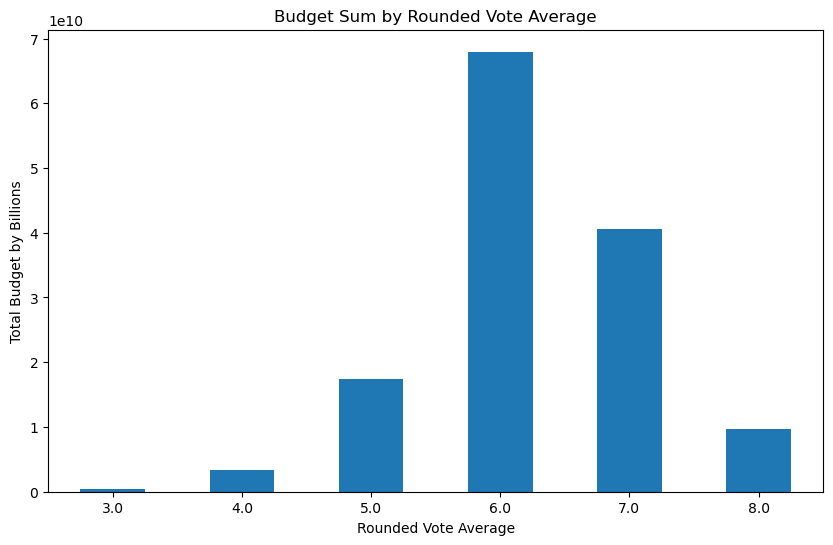

In [27]:
# Round the "vote_average" column to whole numbers
df['rounded_vote_average'] = df['vote_average'].round(0)

# Group by rounded vote_average and calculate the sum of budgets for each rounded vote_average
grouped_data = df.groupby('rounded_vote_average')['budget'].sum()

# Create a bar graph
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.title("Budget Sum by Rounded Vote Average")
plt.xlabel("Rounded Vote Average")
plt.ylabel("Total Budget by Billions")
plt.xticks(rotation=0)  # Avoid rotating x-axis labels

plt.xlim(2.5, 8.5)
#plt.ylim(0, 7e9)

plt.show()

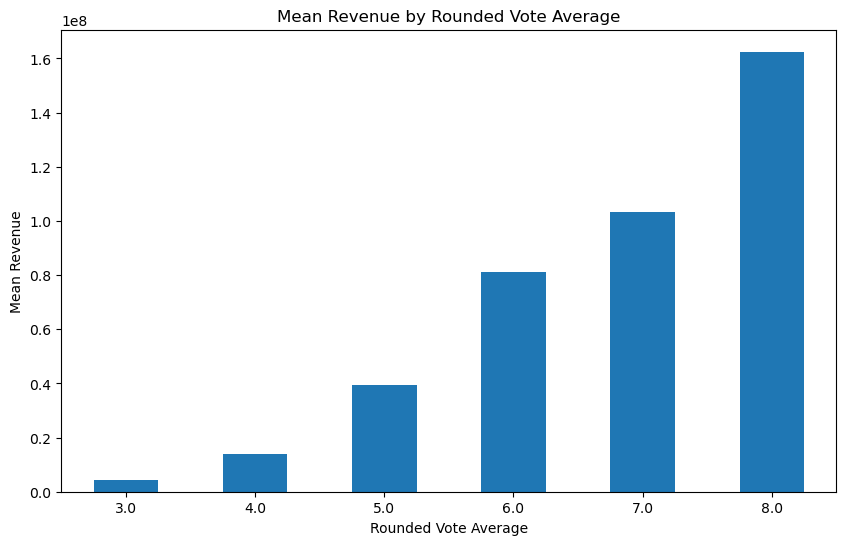

In [28]:
grouped_data = df.groupby('rounded_vote_average')['revenue'].mean()

# Create a bar graph
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.title("Mean Revenue by Rounded Vote Average")
plt.xlabel("Rounded Vote Average")
plt.ylabel("Mean Revenue")
plt.xticks(rotation=0)  # Avoid rotating x-axis labels
plt.xlim(2.5, 8.5)
plt.show()